Objectives of this assignment:

1. Binary classification using different variations of KNN algorithm. 

2. Implementation of different types of visualization techniques like boxplots, scatterplots, etc.

3. Link to the dataset: https://archive.ics.uci.edu/ml/datasets/Vertebral+Column

In [1]:
#Import essential data visualizatinon libraries like matplotlib and seaborn
#Import essential data manipulation libraries like numpy and pandas
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import seaborn as sns
import pylab
%matplotlib inline

In [2]:
!git clone https://github.com/GautamSPhadke/Datasets.git

fatal: destination path 'Datasets' already exists and is not an empty directory.


Download and store the Vertebral column data

In [3]:
#Store the given data in a dataframe format
#url = 'https://archive.ics.uci.edu/ml/datasets/Vertebral+Column'
data = pd.read_csv('Datasets/column_2C.dat', delim_whitespace = True,
                   names = ['pelvic incidence','pelvic tilt','lumbar lordosis angle','sacral slope',
                           'pelvic radius','grade of spondylolisthesis','label'])

### Scatter plot of independent variables in the dataset. Blue color represents abnormal class, while orange color represents normal class

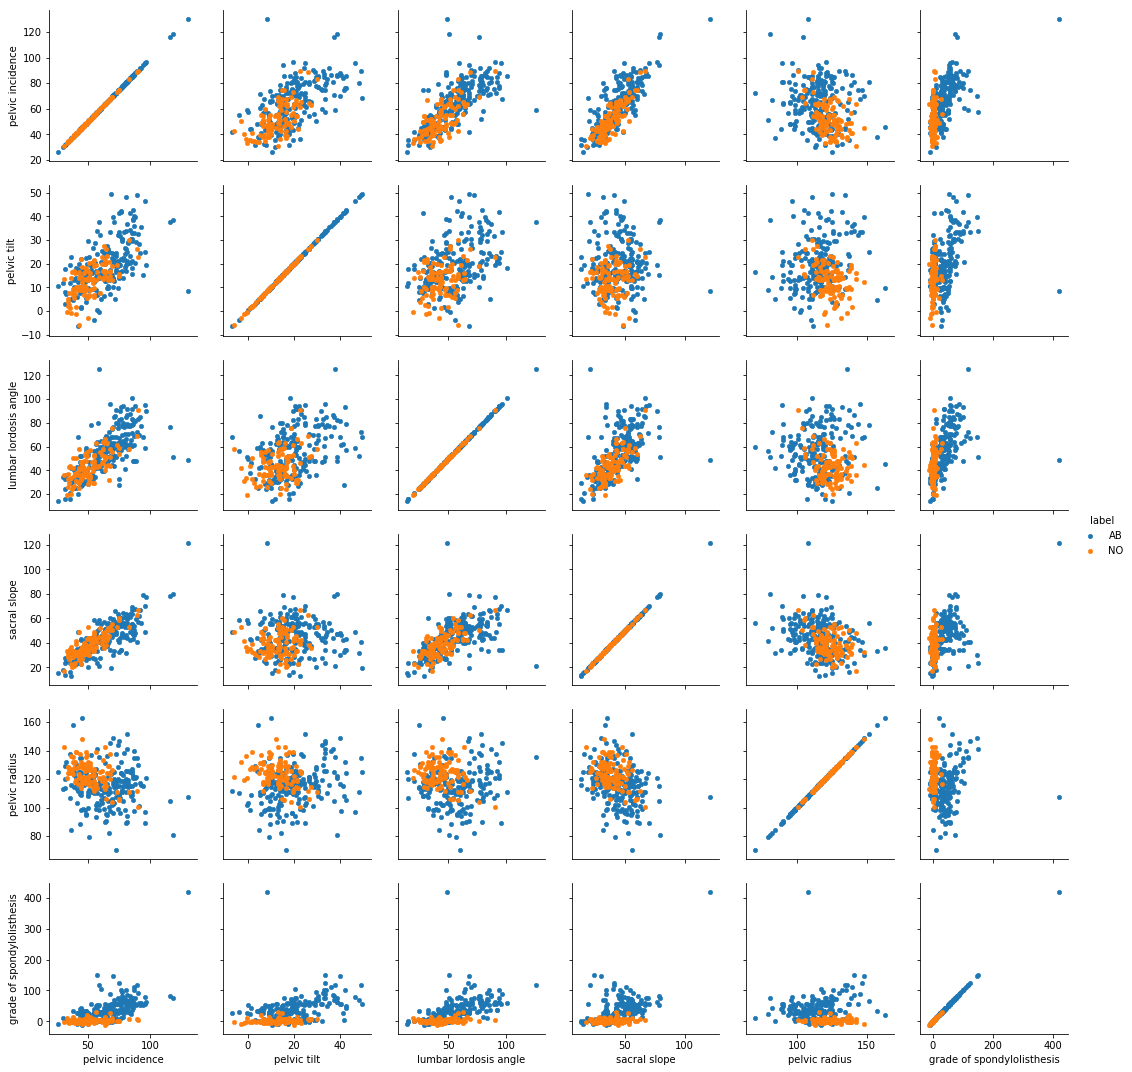

In [6]:
def scatter_plot(datafile):
    scatter_graph = sns.PairGrid(datafile, hue = "label")
    scatter_graph = scatter_graph.map(plt.scatter, linewidth = 0.5, s = 20)
    scatter_graph = scatter_graph.add_legend()
    
scatter_plot(data)

### Box plot for independent variables.

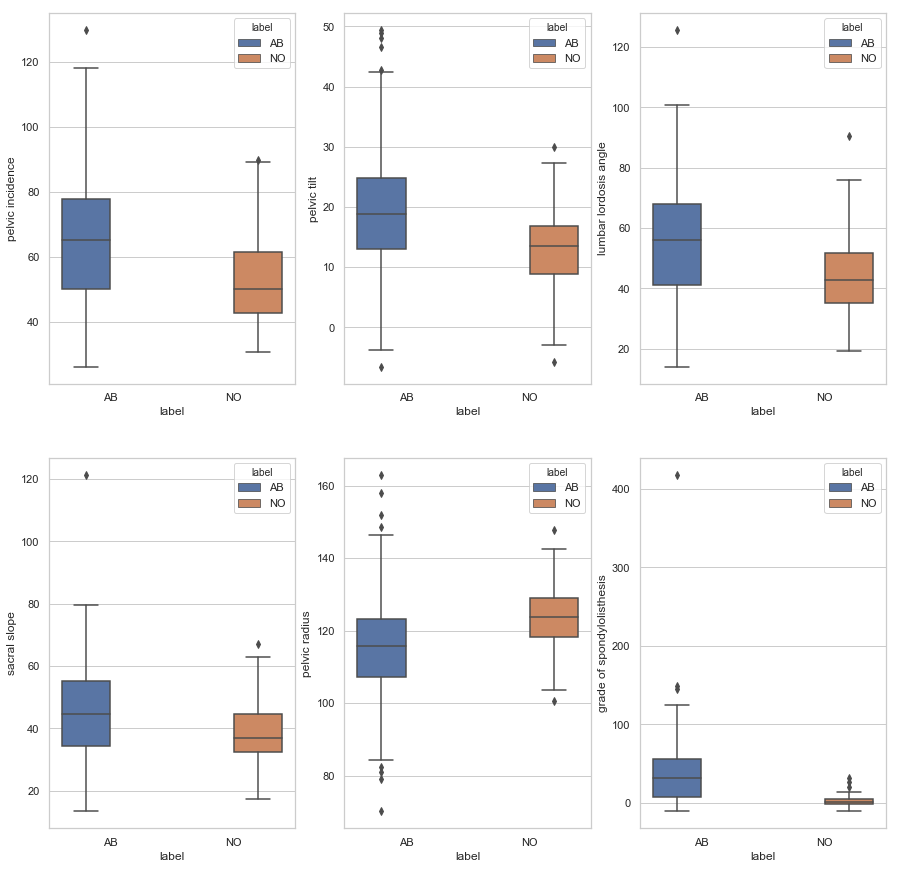

In [7]:
def boxplot(datafile):
    sns.set(style = "whitegrid")
    f, axes = plt.subplots(2,3, figsize = (15,15))
    boxplt = sns.boxplot(x = "label", y = "pelvic incidence", hue = "label", data = datafile, ax = axes[0,0])
    boxplt = sns.boxplot(x = "label", y = "pelvic tilt", hue = "label", data = datafile, ax = axes[0,1])
    boxplt = sns.boxplot(x = "label", y = "lumbar lordosis angle", hue = "label", data = datafile, ax = axes[0,2])
    boxplt = sns.boxplot(x = "label", y = "sacral slope", hue = "label", data = datafile, ax = axes[1,0])
    boxplt = sns.boxplot(x = "label", y = "pelvic radius", hue = "label", data = datafile, ax = axes[1,1])
    boxplt = sns.boxplot(x = "label", y = "grade of spondylolisthesis", hue = "label", data = datafile, ax = axes[1,2])

boxplot(data)

After observing the boxplots, we can see that the features like Grade of spondhylolisthesis, pelvic radius and pelvic tilt have a better class seperation

In [8]:
#Split the data based on normal and abnormal classes
data_abnormal = data.loc[data['label'] == 'AB']
data_normal = data.loc[data['label'] == 'NO']

In [9]:
data_abnormal.shape, data_normal.shape

((210, 7), (100, 7))

### Data Preparation step

Although, sklearn.model_selection.train_test_split is normally used to split the data, for the sake of demonstration, we select the first 70 samples of the normal class data, and first 140 samples of the abnormal class data, as our training set

In [10]:
#Split the normal and abnormal class data into train and test sets
data_normal_train = data_normal.iloc[:70]
data_normal_test = data_normal.iloc[70:]
data_abnormal_train = data_abnormal.iloc[:140]
data_abnormal_test = data_abnormal.iloc[140:]

In [11]:
data_normal_train.shape, data_normal_test.shape, data_abnormal_train.shape, data_abnormal_test.shape

((70, 7), (30, 7), (140, 7), (70, 7))

In [12]:
data_train = pd.concat([data_normal_train, data_abnormal_train], axis = 0)
data_test = pd.concat([data_normal_test, data_abnormal_test], axis = 0)

In [13]:
data_train.shape, data_test.shape

((210, 7), (100, 7))

In [14]:
data_train_label = data_train.iloc[:,6]
data_test_label = data_test.iloc[:,6]
data_train_features = data_train.drop(columns = ['label'], axis = 1)
data_test_features = data_test.drop(columns = ['label'], axis = 1)

In [15]:
data_train_label.shape, data_test_label.shape, data_train_features.shape, data_test_features.shape

((210,), (100,), (210, 6), (100, 6))

In [16]:
data_train_label.replace(('NO','AB'),(0,1), inplace = True)
data_test_label.replace(('NO','AB'),(0,1), inplace = True)

Import essential sklearn functions for implementation of K Nearest Neighbors classifier

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

### Simple code for implementation of KNN using euclidean metrics

In [18]:
def knn_starter(data_train_features, data_train_label, data_test_features, data_test_label):
    knn = KNeighborsClassifier()
    knn.fit(data_train_features, data_train_label)
    
    train_error = 1 - knn.score(data_train_features, data_train_label)
    test_error = 1 - knn.score(data_test_features, data_test_label)
    print('train error = %f' %(train_error))
    print('test error = %f' %(test_error))

In [19]:
knn_starter(data_train_features, data_train_label, data_test_features, data_test_label)

train error = 0.147619
test error = 0.100000


### Finding suitable k-value

In [20]:
def test_train(data_train_features, data_train_label, data_test_features, data_test_label):
    training_error_list = []
    test_error_list = []
    for i in range(208,0,-1):
        knn = KNeighborsClassifier(n_neighbors = i, p = 2)
        knn.fit(data_train_features, data_train_label)
        print(i)
        training_error = 1 - knn.score(data_train_features, data_train_label)
        test_error = 1 - knn.score(data_test_features, data_test_label)
        print('training error: %f'  %(training_error))
        print('test error: %f'  %(test_error))
        print()
        training_error_list.append(training_error)
        test_error_list.append(test_error)
    return training_error_list, test_error_list

In [21]:
def test_train_plot(training_error_list, test_error_list):
    plt.plot(range(208,0,-1), training_error_list, label = 'training_error')
    plt.plot(range(208,0,-1), test_error_list, label = 'test_error')
    plt.xlim(208,0)
    plt.gca().legend(('training_error','test_error'))
    plt.show()    

In [22]:
training_error_list, test_error_list = test_train(data_train_features, data_train_label, data_test_features, data_test_label)

208
training error: 0.333333
test error: 0.300000

207
training error: 0.333333
test error: 0.300000

206
training error: 0.333333
test error: 0.300000

205
training error: 0.333333
test error: 0.300000

204
training error: 0.333333
test error: 0.300000

203
training error: 0.333333
test error: 0.300000

202
training error: 0.333333
test error: 0.300000

201
training error: 0.333333
test error: 0.300000

200
training error: 0.333333
test error: 0.300000

199
training error: 0.333333
test error: 0.300000

198
training error: 0.333333
test error: 0.300000

197
training error: 0.333333
test error: 0.300000

196
training error: 0.333333
test error: 0.300000

195
training error: 0.333333
test error: 0.300000

194
training error: 0.333333
test error: 0.300000

193
training error: 0.333333
test error: 0.300000

192
training error: 0.333333
test error: 0.300000

191
training error: 0.333333
test error: 0.300000

190
training error: 0.333333
test error: 0.300000

189
training error: 0.333333
te

training error: 0.142857
test error: 0.110000

25
training error: 0.138095
test error: 0.110000

24
training error: 0.133333
test error: 0.110000

23
training error: 0.142857
test error: 0.110000

22
training error: 0.152381
test error: 0.100000

21
training error: 0.138095
test error: 0.100000

20
training error: 0.152381
test error: 0.100000

19
training error: 0.147619
test error: 0.110000

18
training error: 0.147619
test error: 0.110000

17
training error: 0.152381
test error: 0.110000

16
training error: 0.157143
test error: 0.090000

15
training error: 0.142857
test error: 0.110000

14
training error: 0.142857
test error: 0.100000

13
training error: 0.142857
test error: 0.120000

12
training error: 0.152381
test error: 0.100000

11
training error: 0.147619
test error: 0.120000

10
training error: 0.133333
test error: 0.100000

9
training error: 0.142857
test error: 0.130000

8
training error: 0.133333
test error: 0.080000

7
training error: 0.142857
test error: 0.120000

6
trai

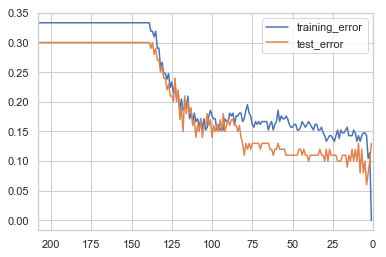

In [23]:
test_train_plot(training_error_list, test_error_list)

## As we can observe from the plot, training_error_list and test_error_list, we get the ideal value of Neighbors for k = 4, in which case the training_error is 0.142875 while the test_error is 0.06000

In [24]:
import itertools
import math

## Calculation of confusion matrix, TPR, TNR, precision and F-score for k = k*

In [25]:
def calculations(cm):
    tn = cm[0,0]
    tp = cm[1,1]
    fp = cm[0,1]
    fn = cm[1,0]
    
    precision = tp/(tp+fp)
    true_positive_rate = tp/(tp+fn)
    true_negative_rate = tn/(tn+fp)
    f_score = (2*tp)/(2*tp + fp + fn)
    
    print('precision = %f' %(precision))
    print('true_positive_rate = %f' %(true_positive_rate))
    print('true_negative_rate = %f' %(true_negative_rate))
    print('f_score = %f' %(f_score))

def plot_confusion_matrix(cm, classes, title = 'confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes) - 2)
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

def knn_optimal(data_train_features, data_train_label, data_test_features, data_test_label):
    knn = KNeighborsClassifier(n_neighbors = 4, p = 2)
    knn.fit(data_train_features, data_train_label)
    predicted_value = knn.predict(data_test_features)
    cm = confusion_matrix(data_test_label, predicted_value)
    classes = ['Normal', 'Abnormal']
    plot_confusion_matrix(cm, classes)
    calculations(cm)
    


precision = 0.932432
true_positive_rate = 0.985714
true_negative_rate = 0.833333
f_score = 0.958333


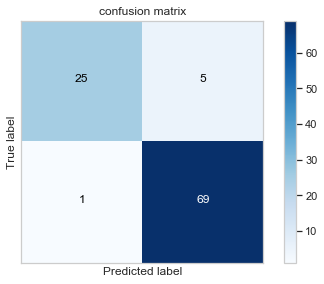

In [26]:
knn_optimal(data_train_features, data_train_label, data_test_features, data_test_label)

### Best test error plot

In [27]:
def best_test_error_rate_plot(min_test_error_list):
    plt.title('Error rate vs Sample size graph')
    plt.plot(range(10,211,10), min_test_error_list)
    plt.xlabel('Sample Size (No. of samples selected)')
    plt.ylabel('Error rate')
    plt.xlim(0,210)
    plt.show()
    
def data_formation(data_train, n):
    data_abnormal = data_train.loc[data['label'] == 'AB']
    data_normal = data_train.loc[data['label'] == 'NO']
    data_abnormal_train = data_abnormal.iloc[:n - math.floor(n/3)]
    data_normal_train = data_normal.iloc[:math.floor(n/3)]
    
    data_train = pd.concat([data_abnormal_train, data_normal_train], axis = 0)
    data_train_label = data_train.iloc[:,6]
    data_train_features = data_train.drop(columns = ['label'], axis = 1)
    
    return data_train_features, data_train_label

def knn_no_of_samples(data_train, data_test_features, data_test_label):
    min_test_error_list = []
    for n in range(10,211,10):
        data_train_features, data_train_label = data_formation(data_train, n)
        
        test_error_list = []
        for k in range(1,n,5):
            knn = KNeighborsClassifier(n_neighbors = k, p = 2)
            knn.fit(data_train_features, data_train_label)
            test_error = 1 - knn.score(data_test_features, data_test_label)
            test_error_list.append(test_error)
        min_test_error_list.append(min(test_error_list))
    
    best_test_error_rate_plot(min_test_error_list)
    
    

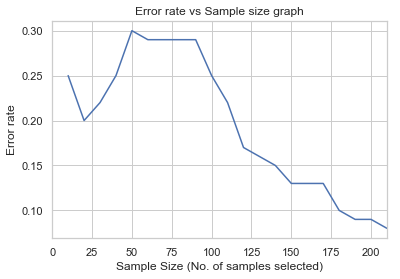

In [28]:
knn_no_of_samples(data_train, data_test_features, data_test_label)

### KNN implementation Using manhattan distance as a metric

In [29]:
def knn_manhattan_plot(test_error_list):
    plt.plot(range(1,197,5), test_error_list)
    plt.xlabel('No. of neighbors')
    plt.ylabel('test error rate')
    plt.show()


def knn_manhattan(data_train_features, data_train_label, data_test_features, data_test_label):
    test_error_list = []
    for k in range(1,197,5):
        knn = KNeighborsClassifier(n_neighbors = k, p = 1)
        knn.fit(data_train_features, data_train_label)
        test_error = 1 - knn.score(data_test_features, data_test_label)
        print(k)
        print(test_error)
        print()
        test_error_list.append(test_error)
    knn_manhattan_plot(test_error_list)

1
0.12

6
0.10999999999999999

11
0.10999999999999999

16
0.12

21
0.12

26
0.10999999999999999

31
0.12

36
0.13

41
0.13

46
0.13

51
0.14

56
0.13

61
0.15000000000000002

66
0.15000000000000002

71
0.14

76
0.14

81
0.16000000000000003

86
0.15000000000000002

91
0.19999999999999996

96
0.19999999999999996

101
0.21999999999999997

106
0.20999999999999996

111
0.22999999999999998

116
0.20999999999999996

121
0.21999999999999997

126
0.24

131
0.28

136
0.28

141
0.30000000000000004

146
0.30000000000000004

151
0.30000000000000004

156
0.30000000000000004

161
0.30000000000000004

166
0.30000000000000004

171
0.30000000000000004

176
0.30000000000000004

181
0.30000000000000004

186
0.30000000000000004

191
0.30000000000000004

196
0.30000000000000004



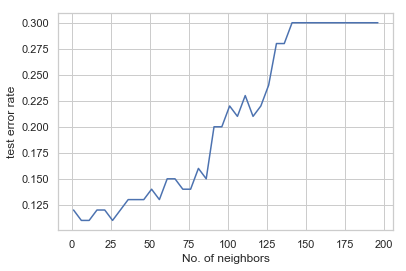

In [30]:
knn_manhattan(data_train_features, data_train_label, data_test_features, data_test_label)

## As we can observe from above results, best test value of 0.1099 is obtained when k* = 6

##  Finding best value of log10(p)

In [31]:
def p_plot(test_error_list, log_list):
    plt.plot(log_list, test_error_list)
    
    plt.show()

def knn_p_value(data_train_features, data_train_label, data_test_features, data_test_label):
    test_error_list = []
    log_list = [i/10 for i in range(1,11,1)]
    p_list = [math.pow(10,i) for i in log_list]
    for p in p_list:
        knn = KNeighborsClassifier(n_neighbors = 6, p = p)
        knn.fit(data_train_features, data_train_label)
        test_error = 1 - knn.score(data_test_features, data_test_label)
        print (math.log10(p))
        print (test_error)
        print()
        test_error_list.append(test_error)
    p_plot(test_error_list, log_list)
    

0.10000000000000002
0.08999999999999997

0.20000000000000004
0.08999999999999997

0.29999999999999993
0.07999999999999996

0.4
0.07999999999999996

0.5
0.07999999999999996

0.6
0.06000000000000005

0.7
0.06999999999999995

0.8
0.07999999999999996

0.9
0.08999999999999997

1.0
0.08999999999999997



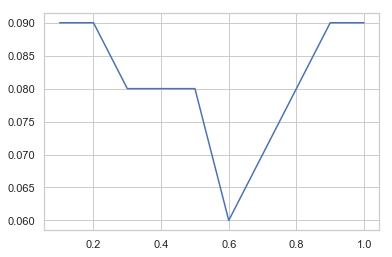

In [32]:
knn_p_value(data_train_features, data_train_label, data_test_features, data_test_label)

## As we can see from the graph, the best value of log10(p) is 0.6, when the test error becomes 0.060

##  Using Chebyschev distance as a metrics

In [33]:
def knn_chebyschev_plot(test_error_list):
    plt.plot(range(1,197,5), test_error_list)
    plt.xlabel('No. of neighbors')
    plt.ylabel('test error rate')
    plt.show()

def knn_chebyschev(data_train_features, data_train_label, data_test_features, data_test_label):
    test_error_list = []
    for k in range (1,197,5):
        knn = KNeighborsClassifier(n_neighbors = k, metric = 'chebyshev')
        knn.fit(data_train_features, data_train_label)
        test_error = 1 - knn.score(data_test_features, data_test_label)
        print(k)
        print(test_error)
        print()
        test_error_list.append(test_error)
    
    knn_chebyschev_plot(test_error_list)
    

1
0.13

6
0.09999999999999998

11
0.12

16
0.07999999999999996

21
0.10999999999999999

26
0.12

31
0.12

36
0.09999999999999998

41
0.13

46
0.12

51
0.12

56
0.12

61
0.14

66
0.13

71
0.14

76
0.10999999999999999

81
0.14

86
0.12

91
0.15000000000000002

96
0.14

101
0.18999999999999995

106
0.18000000000000005

111
0.18000000000000005

116
0.18000000000000005

121
0.20999999999999996

126
0.20999999999999996

131
0.25

136
0.28

141
0.30000000000000004

146
0.30000000000000004

151
0.30000000000000004

156
0.30000000000000004

161
0.30000000000000004

166
0.30000000000000004

171
0.30000000000000004

176
0.30000000000000004

181
0.30000000000000004

186
0.30000000000000004

191
0.30000000000000004

196
0.30000000000000004



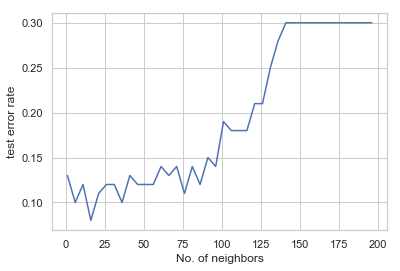

In [34]:
knn_chebyschev(data_train_features, data_train_label, data_test_features, data_test_label)

## As we can clearly observe from the graph and the test_error_list, the minimum test error rate occurs when k = 16. The value at test error rate at k = 16 is 0.0799

##  Using Mahalanobis distance as a metrics

In [35]:
def knn_mahalanobis_plot(test_error_list):
    plt.plot(range(1,197,5), test_error_list)
    plt.xlabel('No. of neighbors')
    plt.ylabel('test error rate')
    plt.show()

def knn_mahalanobis(data_train_features, data_train_label, data_test_features, data_test_label):
    test_error_list = []
    for k in range (1,197,5):
        knn = KNeighborsClassifier(n_neighbors = k, algorithm='brute', metric = 'mahalanobis', metric_params = 
                                  {'V': np.cov(data_train_features)})
        knn.fit(data_train_features, data_train_label)
        test_error = 1 - knn.score(data_test_features, data_test_label)
        print(k)
        print(test_error)
        print()
        test_error_list.append(test_error)
    
    knn_mahalanobis_plot(test_error_list)

1
0.18000000000000005

6
0.16000000000000003

11
0.18999999999999995

16
0.19999999999999996

21
0.22999999999999998

26
0.20999999999999996

31
0.20999999999999996

36
0.22999999999999998

41
0.22999999999999998

46
0.24

51
0.25

56
0.26

61
0.26

66
0.26

71
0.27

76
0.27

81
0.25

86
0.27

91
0.28

96
0.26

101
0.28

106
0.29000000000000004

111
0.29000000000000004

116
0.29000000000000004

121
0.30000000000000004

126
0.30000000000000004

131
0.30000000000000004

136
0.30000000000000004

141
0.30000000000000004

146
0.30000000000000004

151
0.30000000000000004

156
0.30000000000000004

161
0.30000000000000004

166
0.30000000000000004

171
0.30000000000000004

176
0.30000000000000004

181
0.30000000000000004

186
0.30000000000000004

191
0.30000000000000004

196
0.30000000000000004



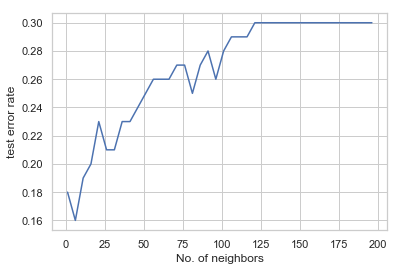

In [36]:
knn_mahalanobis(data_train_features, data_train_label, data_test_features, data_test_label)

## As we can observe from the above results, the minimum test error value of 0.16 occurs at k = 6

## Table for best test errors

In [37]:
best_test_error_table = pd.DataFrame(columns = ['Distance Metrics', 'k*', 'test error rate value'],
                                     index = ['1','2','3','4'])
Euclid = {'Distance Metrics' : 'Euclidean Distance', 'k*' : '4', 'test error rate value' : '0.0600'}
Manhattan = {'Distance Metrics': 'Manhattan Distance', 'k*' : '6', 'test error rate value' : '0.1099'}
Chebyschev = {'Distance Metrics' : 'Chebyschev Distance', 'k*': '16', 'test error rate value': '0.0799'}
Mahalanobis = {'Distance Metrics' : 'Mahalanobis Distance', 'k*' : '6', 'test error rate value' : '0.16'}

In [38]:
best_test_error_table.loc['1'] = pd.Series(Euclid)
best_test_error_table.loc['2'] = pd.Series(Manhattan)
best_test_error_table.loc['3'] = pd.Series(Chebyschev)
best_test_error_table.loc['4'] = pd.Series(Mahalanobis)

In [39]:
best_test_error_table

,Distance Metrics,k*,test error rate value
1,Euclidean Distance,4,0.0600
2,Manhattan Distance,6,0.1099
3,Chebyschev Distance,16,0.0799
4,Mahalanobis Distance,6,0.16


##  Using weighted distance to find best test error

In [40]:
def plot_metrics(test_error_list, training_error_list):
    plt.plot(range(1,197,5), test_error_list)
    plt.plot(range(1,197,5), training_error_list)
    plt.xlabel('No. of neighbors')
    plt.ylabel('test error rate')
    plt.show()

def weighted_knn(data_train_features, data_train_label, data_test_features, data_test_label):
    for metrics in {'euclidean', 'manhattan', 'chebyshev'}:
        print(metrics)
        print()
        test_error_list = []
        training_error_list = []
        for k in range(1,197,5):
            knn = KNeighborsClassifier(n_neighbors = k, metric = metrics, weights = 'distance')
            knn.fit(data_train_features, data_train_label)
            training_error = 1 - knn.score(data_train_features, data_train_label)
            test_error = 1 - knn.score(data_test_features, data_test_label)
            
            training_error_list.append(training_error)
            test_error_list.append(test_error)
        print('Best test error for ', metrics ,' is ', min(test_error_list))
        plot_metrics(test_error_list, training_error_list)


            

manhattan

Best test error for  manhattan  is  0.09999999999999998


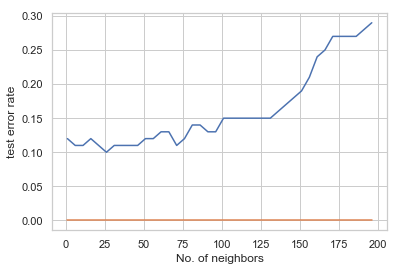

euclidean

Best test error for  euclidean  is  0.09999999999999998


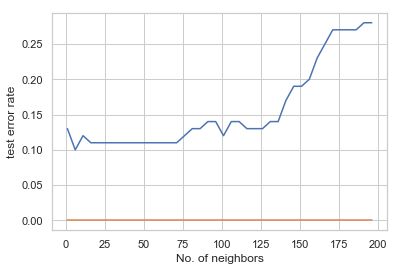

chebyshev

Best test error for  chebyshev  is  0.10999999999999999


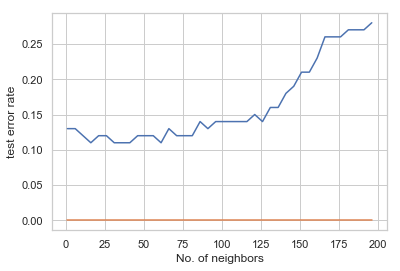

In [41]:
weighted_knn(data_train_features, data_train_label, data_test_features, data_test_label)

##  The lowest training error rate achieved was 0. This was achieved for all k values for Euclidean, Manhattan and Chebyschev distances in weighted decision.